# Class Central Survey Dec 2016 - Jan 2017

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
sns.set_context("talk")

## Read the data file

In [2]:
df = pd.read_csv('raw/2016-17-ClassCentral-Survey-data-noUserText.csv', decimal=',', encoding = "ISO-8859-1")

## Experience with MOOCs

### Decision criteria to take MOOCs

In [3]:
def multi_select_categorical_barh(df, question, selectors):
    """draw a barchart for Survey results on a question that allows to select multiple categories
    df: dataframe to use
    question: the question you want to analyse
    selectors: list of df column containing the selectors (values 0/1)"""
    size_df = len(df)
    
    graph_data = df.loc[:, selectors]
    graph_data['target'] = 'target_name'
    
    melted = pd.melt(graph_data, id_vars='target', var_name='select', value_name='percentage')
    grouped = melted.groupby(['select'], as_index=False).sum()

    grouped.percentage = grouped.percentage/size_df*100 # make it percentage of total
    grouped['select'] = grouped['select'].apply(lambda x: x.split(": ")[1]) # remove prefix from string
    print(grouped)  
    
    sns.barplot(x='percentage', y='select', data=grouped.sort_values('percentage', ascending=False), orient='h')
    sns.plt.title(question)
    sns.plt.xlabel('Percentage')
    sns.plt.ylabel('')
    
    sns.despine(left=True, bottom=True)
    sns.plt.show()


                   select  percentage
0  Institution/university   41.268567
1              Instructor   16.057808
2  Others recommendations   25.250903
3                Platform   27.177840
4                 Ratings   32.838218
5           Topic/Subject   91.087916


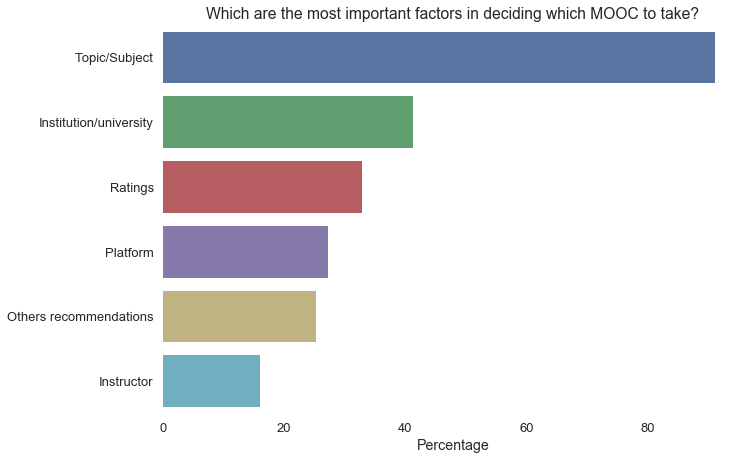

In [4]:
decisions = ['Decide: Topic/Subject', 'Decide: Instructor', 'Decide: Institution/university', 
             'Decide: Platform', 'Decide: Ratings', 'Decide: Others recommendations']
multi_select_categorical_barh(df,
                question='Which are the most important factors in deciding which MOOC to take?', 
                selectors=decisions)

## Benefits of MOOCs

In [5]:
# new chart here on benefits

                                         select  percentage
0  Helped me get a new job in a different field    4.255319
1     Helped me get a new job in the same field    4.897631
2  Higher performance evaluation at current job   11.401044
3                                    Not Really   34.524287
4             Promotion at current organization    2.930550
5                School credit towards a degree    3.091128


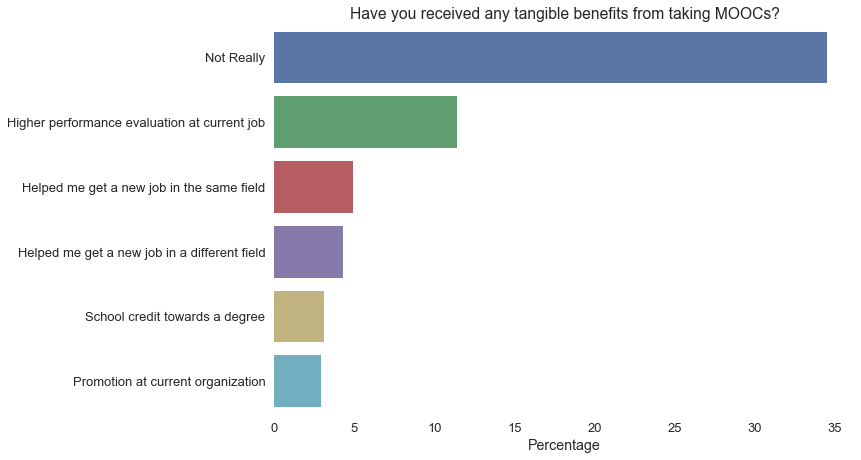

In [6]:
benefits = [#'Benefit: Have not taken MOOCs', 
            'Benefit: Not Really',
            'Benefit: School credit towards a degree',
            'Benefit: Promotion at current organization',
            'Benefit: Higher performance evaluation at current job',
            'Benefit: Helped me get a new job in the same field',
            'Benefit: Helped me get a new job in a different field']
multi_select_categorical_barh(df,
                question='Have you received any tangible benefits from taking MOOCs?', 
                selectors=benefits)

In [7]:
# new charts on aspects

                                              select  percentage
0         Actively contributing to discussion forums   30.429546
1                         Browsing discussion forums   53.873946
2  Connecting with learners outside the course en...   15.335207
3  Connecting with other learners in the course e...   38.297872
4  Taking the course with other people you know (...   15.174629


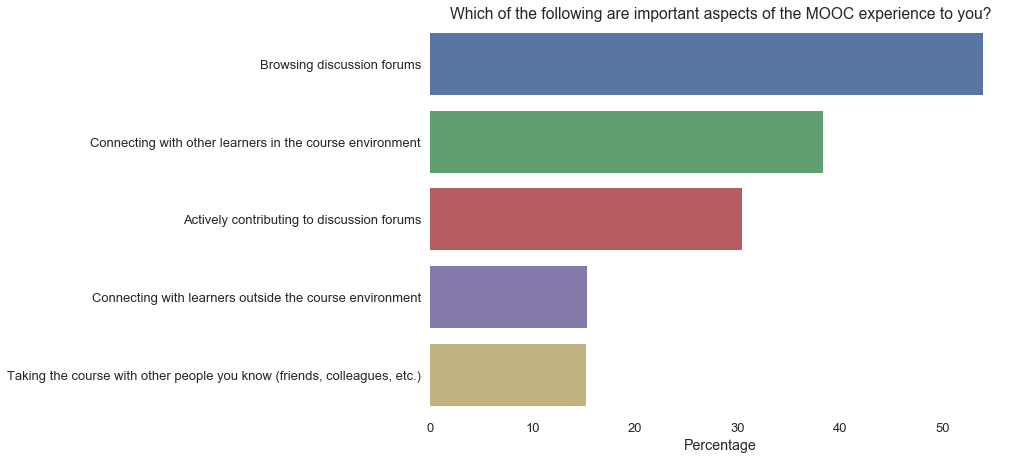

In [8]:
aspects = ['Aspects: Browsing discussion forums', 
           'Aspects: Actively contributing to discussion forums',
           'Aspects: Connecting with other learners in the course environment',
           'Aspects: Connecting with learners outside the course environment',
           'Aspects: Taking the course with other people you know (friends, colleagues, etc.)']
multi_select_categorical_barh(df,
                question='Which of the following are important aspects of the MOOC experience to you?', 
                selectors=aspects)

## Value of MOOCs

In [9]:
# MOOCs finished vs importance certificate - heatmap